In [4]:
# This data set was compiled by Michael Brown in 2014. It contains 
# weekly data for the Dow Jones Industrial Index. The author warns that
# you can't use data from the same day to invest that day. I would also
# like to add my own warning that historical data on the stock market does
# NOT guarantee future performance will be the same or similar.

# Utility Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data import and preview
from ucimlrepo import fetch_ucirepo 
dow_jones_index = fetch_ucirepo(id=312) 
X = dow_jones_index.data.features 
print(X) 

     quarter stock       date    open    high     low   close     volume  \
0          1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1          1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2          1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3          1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4          1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   
..       ...   ...        ...     ...     ...     ...     ...        ...   
745        2   XOM  5/27/2011  $80.22  $82.63  $80.07  $82.63   68230855   
746        2   XOM   6/3/2011  $83.28  $83.75  $80.18  $81.18   78616295   
747        2   XOM  6/10/2011  $80.93  $81.87  $79.72  $79.78   92380844   
748        2   XOM  6/17/2011  $80.00  $80.82  $78.33  $79.02  100521400   
749        2   XOM  6/24/2011  $78.65  $81.12  $76.78  $76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
0                 3.79

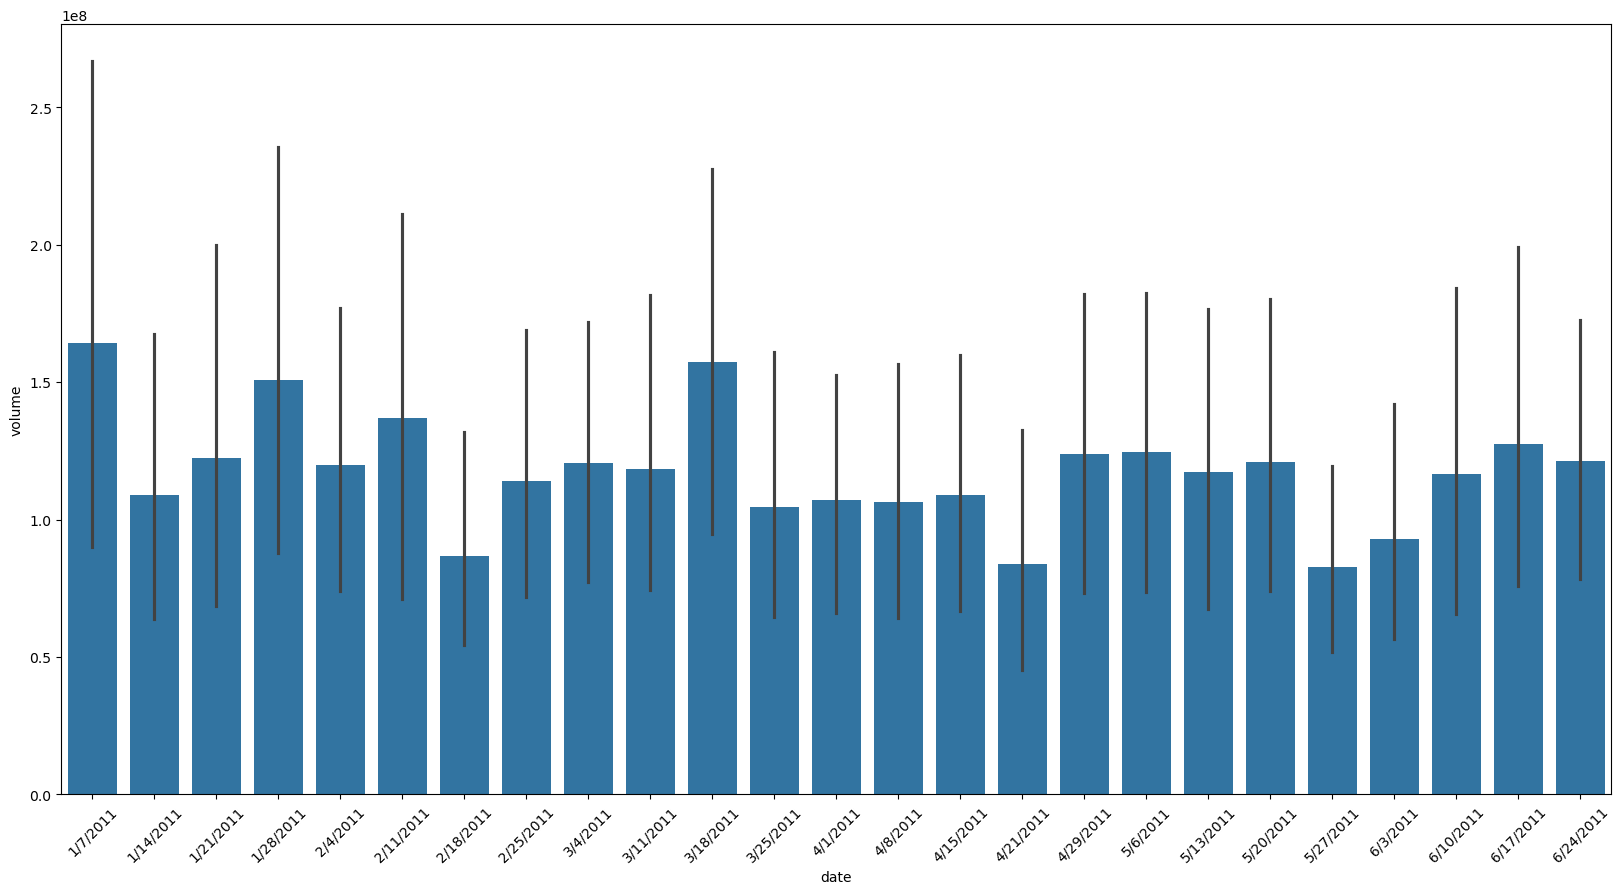

In [5]:
plt.figure(figsize=(20, 10))
sns.barplot(data=X, x="date", y="volume")
plt.xticks(rotation=45)
plt.show()

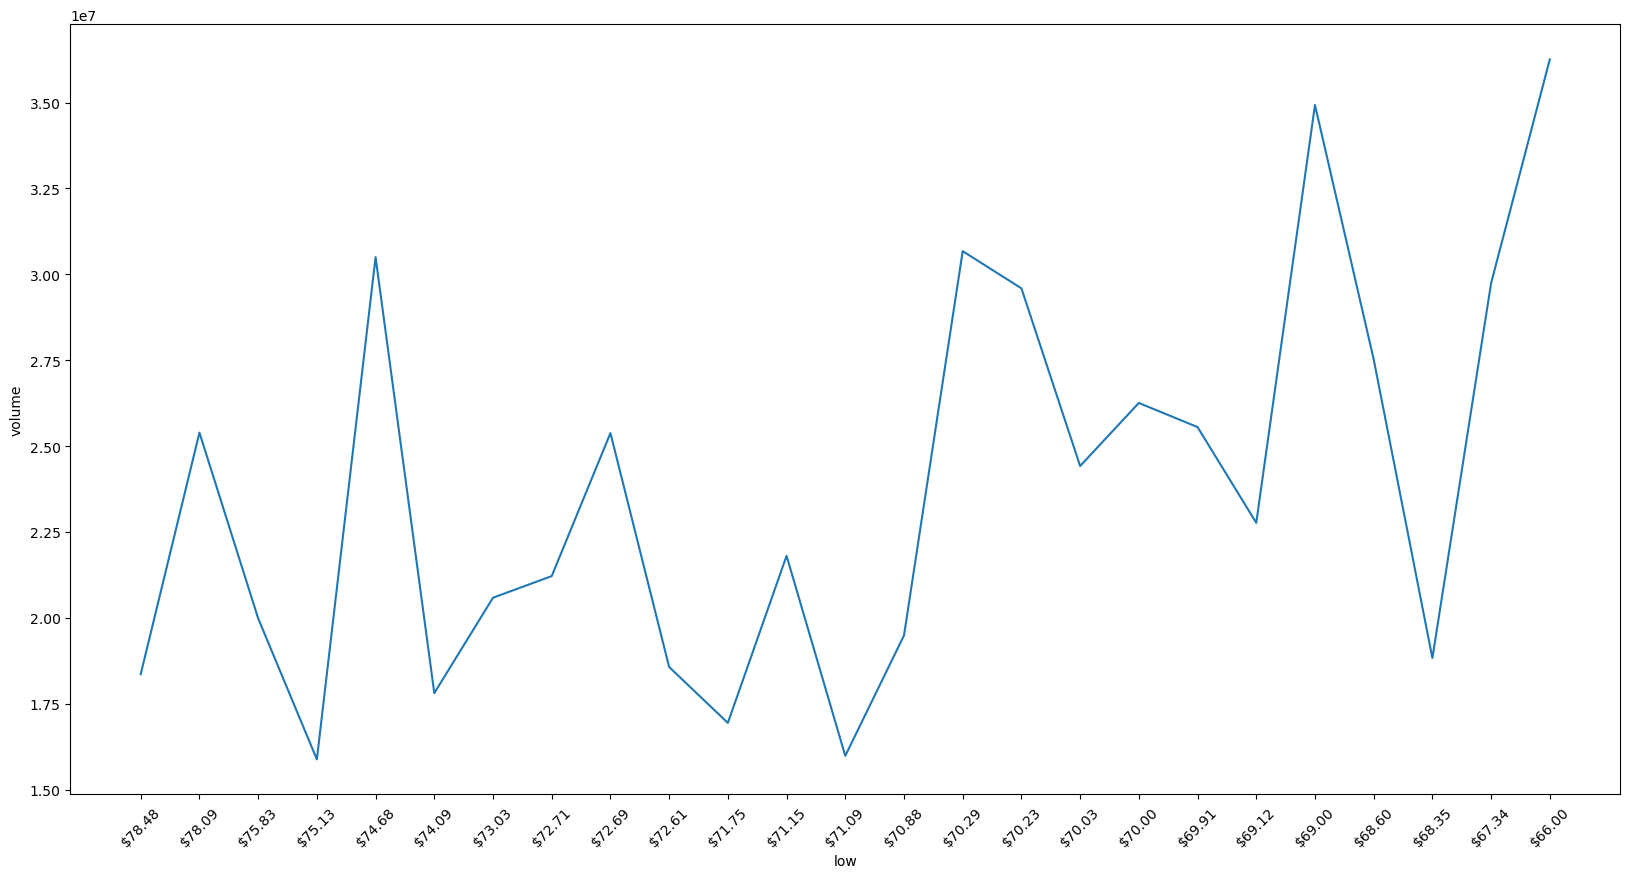

In [6]:

# Filter the data for stock XOM
xom_data = X[X["stock"] == "BA"]

# Sort the data by 'high' values in descending order
xom_data_sorted = xom_data.sort_values("low", ascending=False)

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Create a barplot of high values for XOM, now sorted by 'high'
sns.lineplot(data=xom_data_sorted, x="low", y="volume")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


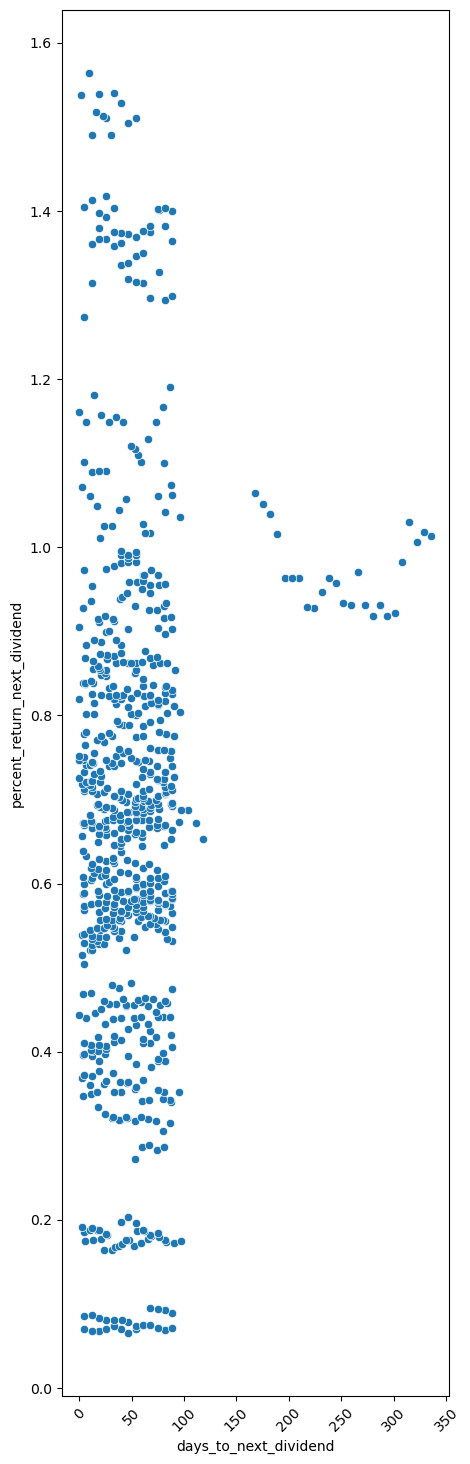

In [9]:
# Now select and sort
c = X['days_to_next_dividend']
d = X['percent_return_next_dividend']

# Sort d and align c
d_sorted = d.sort_values()
c_sorted = c.loc[d_sorted.index]

# Plot
plt.figure(figsize=(5, 18))
sns.scatterplot(x=c_sorted, y=d_sorted)
plt.xticks(rotation=45)
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\zacha\AppData\Local\Temp\ipykernel_18700\3316653120.py:6: SyntaxWarning: invalid escape sequence '\$'
  d_clean = d.replace('[\$,]', '', regex=True).astype(float)


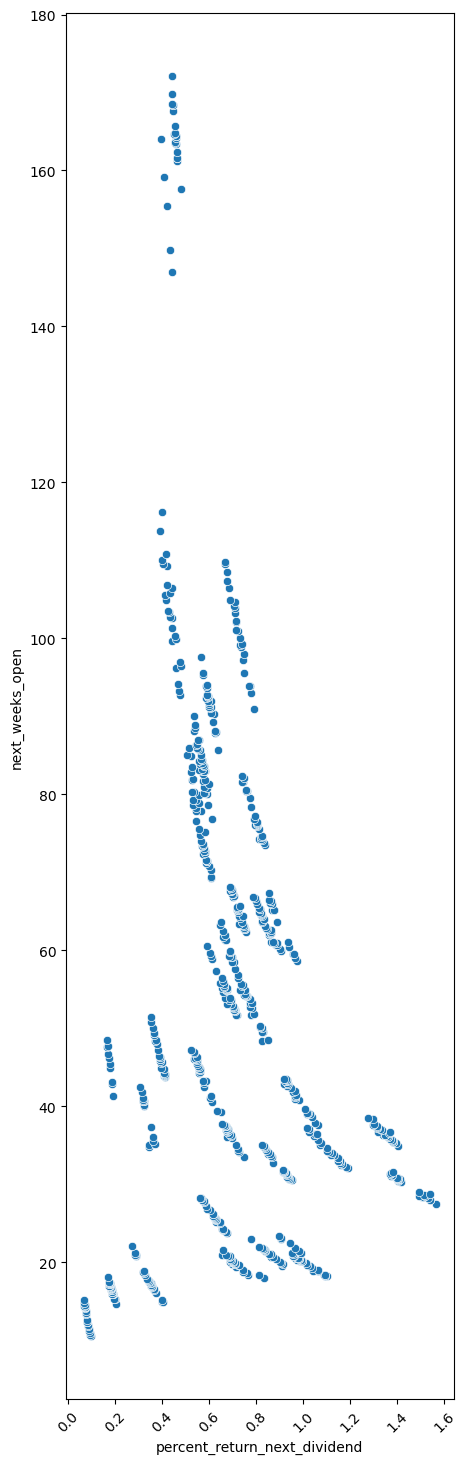

In [18]:
# Select first 100 values
c = X['percent_return_next_dividend']
d = X['next_weeks_open']

# Remove dollar signs and convert to float
d_clean = d.replace('[\$,]', '', regex=True).astype(float)

# Sort d and align c
d_sorted = d_clean.sort_values()
c_aligned = c.loc[d_sorted.index]

# Plot
plt.figure(figsize=(5, 18))
sns.scatterplot(x=c_aligned, y=d_sorted)
plt.xticks(rotation=45)
plt.show()